In [1]:
# Python 3.8
import pandas as pd
import numpy  as np

from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
import  sklearn
print("version scikit-learn: {}".format(sklearn.__version__))
print("version pandas: {}".format(pd.__version__))
print("version numpy: {}".format(np.__version__))


version scikit-learn: 1.0.2
version pandas: 1.3.5
version numpy: 1.21.5


In [3]:
def PLOT34(y_test, y_pred):
    '''
    plots drawing function
    :param y_test: -  test values of the target variable
    :param y_pred: -  predicted values for target variable
    '''
    plt.figure(figsize=(12,6))

    # == Scatterplot of predicted values ==
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1)
    plt.scatter(y_test, y_test,  alpha=0.1)
    plt.title('Scatterplot of predicted values')
    plt.xlabel('test Y')
    plt.ylabel('predicted Y')


    # == Scatterplot of errors ==
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1)
    plt.title('Scatterplot of errors')
    plt.xlabel('test Y')
    plt.ylabel('Absolute error squared')

In [39]:
def GET_METRICS_SINGLE(y_test, y_pred):
    '''
    Calculating and printing meetrics: MAE, RMSE, R2
    based on a comparison of test and predicted values.
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    rmse = np.sqrt( metrics.mean_squared_error(y_test, y_pred))
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE: {:>7,.0f}".format               ( mae ))
    print ("RMSE:{:>7,.0f}".format( rmse ))
    print ("R2:  {:>7,.3f}".format               ( r2 ))


In [9]:
df = pd.read_csv('cleaned_data') #saved from previous jupyter file

df.head()

,pctPopUnderPov,pctUnemployed,totalPctDiv,racePctBlack,racePctWhite,racePctHisp,pctNotHSGrad,violentCrimesPerPop,NumBR_1,NumBR_2,NumBR_3,NumBR_4
0,1.96,2.70,4.47,1.37,91.78,1.88,9.90,41.02,0,0,1,0
1,3.98,2.43,5.42,0.80,95.57,0.85,13.72,127.56,0,0,1,0
2,4.75,4.01,12.55,0.74,94.33,2.35,9.09,218.59,0,0,1,0
3,17.23,9.86,12.91,1.70,97.35,0.70,33.68,306.64,0,0,1,0
4,17.78,5.72,13.04,2.51,95.65,0.95,23.03,442.95,0,1,0,0


In [10]:
features = ['pctPopUnderPov', 'totalPctDiv', 'racePctBlack', 'pctNotHSGrad', 'NumBR_3']
target = ['violentCrimesPerPop']

In [11]:
df = df[features+target]
df.head()

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3,violentCrimesPerPop
0,1.96,4.47,1.37,9.90,1,41.02
1,3.98,5.42,0.80,13.72,1,127.56
2,4.75,12.55,0.74,9.09,1,218.59
3,17.23,12.91,1.70,33.68,1,306.64
4,17.78,13.04,2.51,23.03,0,442.95


# Standardization 1

In [12]:
df_scaled = (df-df.mean())/df.std(ddof=0)
df_scaled[:3]

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3,violentCrimesPerPop
0,-1.182601,-2.144287,-0.612304,-1.160665,0.791889,-0.925277
1,-0.909329,-1.818870,-0.674606,-0.782047,0.791889,-0.757764
2,-0.805161,0.623472,-0.681164,-1.240948,0.791889,-0.581559


# Standardization 2

In [13]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [15]:
print("{:>3} {:<25} {:>16} {:>16}".format( "№", "Column", "Mean", "М.s.deviation"))

for icol in range(0, len(df.columns)):
    print("{:>3} {:<25} {:>16.3f} {:>16.3f}".format(icol, df.columns[icol], scaler.mean_[icol], np.sqrt(scaler.var_[icol])))

  № Column                                Mean    М.s.deviation
  0 pctPopUnderPov                      10.702            7.392
  1 totalPctDiv                         10.730            2.919
  2 racePctBlack                         6.972            9.149
  3 pctNotHSGrad                        21.610           10.089
  4 NumBR_3                              0.615            0.487
  5 violentCrimesPerPop                519.033          516.617


In [17]:
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns, index = df.index)
df_scaled.head()

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3,violentCrimesPerPop
0,-1.182601,-2.144287,-0.612304,-1.160665,0.791889,-0.925277
1,-0.909329,-1.818870,-0.674606,-0.782047,0.791889,-0.757764
2,-0.805161,0.623472,-0.681164,-1.240948,0.791889,-0.581559
3,0.883169,0.746788,-0.576234,1.196282,0.791889,-0.411124
4,0.957575,0.791318,-0.487699,0.140711,-1.262803,-0.147272


#Transform one row back to check

In [18]:
df_scaled[:1]

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3,violentCrimesPerPop
0,-1.182601,-2.144287,-0.612304,-1.160665,0.791889,-0.925277


In [19]:
pd.DataFrame(scaler.inverse_transform(df_scaled[:1]))

,0,1,2,3,4,5
0,1.96,4.47,1.37,9.9,1.0,41.02


In [20]:
df[:1]

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3,violentCrimesPerPop
0,1.96,4.47,1.37,9.9,1,41.02


#Mean and dispersion for violentCrimesPerPop

In [21]:
print(f"Mean - {(scaler.mean_[df.columns.get_loc('violentCrimesPerPop')]):.3f}")
print(f"Dispersion - {(scaler.var_[df.columns.get_loc('violentCrimesPerPop')]):.3f}")

Mean - 519.033
Dispersion - 266892.872


#Histplots for target variable

<AxesSubplot:xlabel='violentCrimesPerPop', ylabel='Count'>

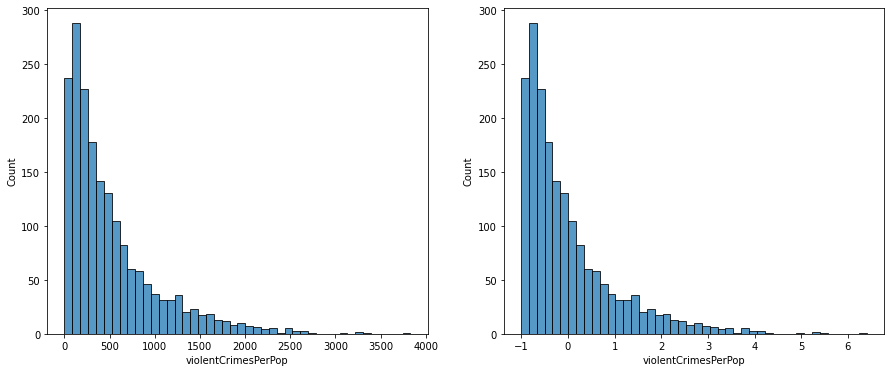

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['violentCrimesPerPop'])
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['violentCrimesPerPop'])

#Form test and train sample

In [23]:
rand_seed = 8
valid_size = 0.3

#non-standardized

In [25]:
x_train, x_test, y_train, y_test =  train_test_split(
    df[features],
    df[target],

    test_size = valid_size,
    random_state=rand_seed,
    shuffle=True
)
y_train = y_train['violentCrimesPerPop']
y_test = y_test['violentCrimesPerPop']

x_train.head()

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3
1240,14.25,9.20,1.10,18.45,0
1046,3.85,6.38,1.62,9.91,1
1256,9.67,13.33,9.83,23.75,0
1186,6.76,9.88,0.46,31.09,1
257,10.19,9.64,0.14,15.20,1


In [26]:
y_train.head()

1240     104.17
1046      33.38
1256    1118.18
1186     117.03
257      291.16
Name: violentCrimesPerPop, dtype: float64

In [27]:
print ("Number of elements: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format(
    len(x_train), len(y_train),
    len(x_test),  len(x_test),
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))

Number of elements: 
  x_train: 1295, y_train 1295 
  x_test:  555, y_test  555 
  total x: 1850, total y 1850 


#Standardized

In [29]:
xStd_train, xStd_test, yStd_train, yStd_test =  train_test_split(
    df_scaled[features],
    df_scaled[target],

    test_size = valid_size,
    random_state=rand_seed,
    shuffle=True
)

yStd_train = yStd_train['violentCrimesPerPop']
yStd_test = yStd_test['violentCrimesPerPop']


xStd_train.head()

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3
1240,0.480026,-0.524052,-0.641815,-0.313234,-1.262803
1046,-0.926916,-1.490027,-0.584978,-1.159674,0.791889
1256,-0.139570,0.890656,0.312395,0.212073,-1.262803
1186,-0.533243,-0.291122,-0.711769,0.939575,0.791889
257,-0.069222,-0.373333,-0.746746,-0.635357,0.791889


#Checking the effect of standardization

#random_state = 8

#Model SGDRegressor. Non-standardized

In [31]:
sgd_reg_nonStd = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,
)

In [33]:
sgd_reg_nonStd.fit(x_train,  y_train)

SGDRegressor(max_iter=10000, random_state=8)

In [36]:
y_pred = sgd_reg_nonStd.predict (x_test)
y_pred[:20]

array([ -41.22412418, 1326.91106622, -457.72614753,  500.57916679,
        593.63947925,  -71.49133158,   62.74154209, -364.458363  ,
        767.31903798,  -67.87995923, -130.98008806,  265.8071465 ,
         52.8392191 , -312.31584724,  251.73834828,  187.38397681,
       -321.07827975,   43.20061082,   59.95610217, -346.64239719])

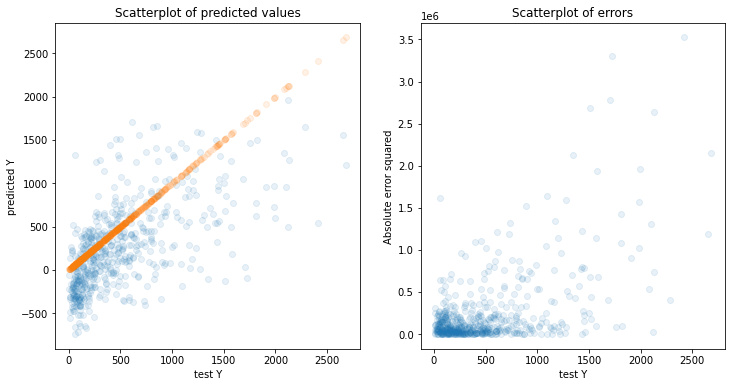

In [37]:
PLOT34(y_test, y_pred)

In [40]:
GET_METRICS_SINGLE(y_test, y_pred)

MAE:     378
RMSE:    492
R2:   -0.062


#Model SGDRegressor. Standardized

In [41]:
sgd_reg_std = linear_model.SGDRegressor(max_iter=10000, tol=1e-3, random_state=8,)

In [42]:
sgd_reg_std.fit(xStd_train, yStd_train)

yStd_pred = sgd_reg_std.predict(xStd_test)

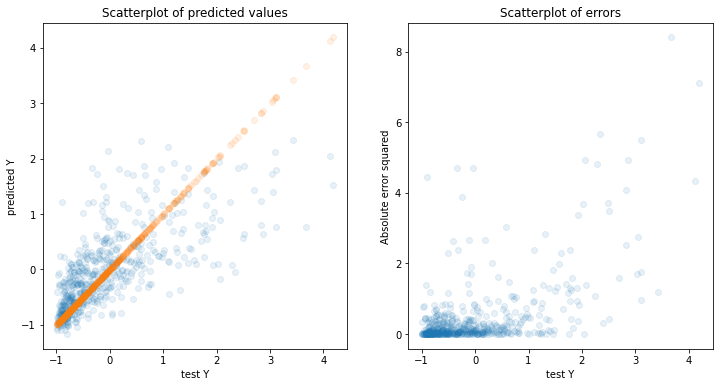

In [43]:
PLOT34(yStd_test, yStd_pred)

In [44]:
GET_METRICS_SINGLE(yStd_test, yStd_pred)

MAE:       0
RMSE:      1
R2:    0.479


#random_state = 50

#Non-standardized

In [45]:
rand_seed = 50

In [46]:
x_train, x_test, y_train, y_test =  train_test_split(
    df[features],
    df[target],

    test_size = valid_size,
    random_state=rand_seed,
    shuffle=True
)
y_train = y_train['violentCrimesPerPop']
y_test = y_test['violentCrimesPerPop']

x_train[:2]

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3
261,3.39,8.02,0.21,13.83,1
508,8.99,12.10,0.97,25.06,0


MAE:     470
RMSE:    557
R2:   -0.310


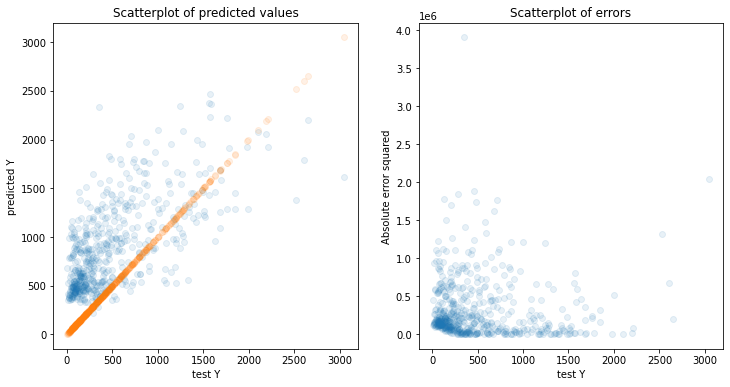

In [48]:
sgd_reg_nonStd = linear_model.SGDRegressor(max_iter=10000, tol=1e-3, random_state=rand_seed)
sgd_reg_nonStd.fit(  x_train,  y_train)
y_pred = sgd_reg_nonStd.predict (x_test)
PLOT34(y_test, y_pred)
GET_METRICS_SINGLE(y_test, y_pred)

#Standardized

In [50]:
xStd_train, xStd_test, yStd_train, yStd_test =  train_test_split(
    df_scaled[features],
    df_scaled[target],

    test_size = valid_size,
    random_state=rand_seed,
    shuffle=True
)

yStd_train = yStd_train['violentCrimesPerPop']
yStd_test = yStd_test['violentCrimesPerPop']


xStd_train.head()

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad,NumBR_3
261,-0.989146,-0.928255,-0.739095,-0.771144,0.791889
508,-0.231562,0.469327,-0.656025,0.341913,-1.262803
398,2.122360,0.972867,-0.278931,1.015893,0.791889
689,0.014653,-0.630241,-0.745653,0.693770,0.791889
181,1.301193,1.897737,2.362911,0.359754,-1.262803


MAE:       0
RMSE:      1
R2:    0.509


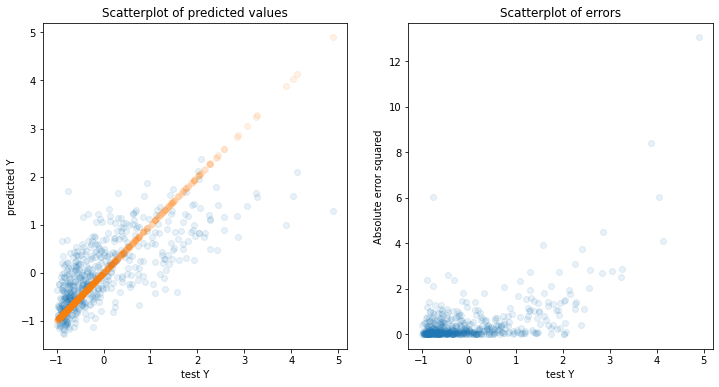

In [51]:
sgd_reg_std = linear_model.SGDRegressor(max_iter=10000, tol=1e-3, random_state=rand_seed)
sgd_reg_std.fit(xStd_train, yStd_train)
yStd_pred = sgd_reg_std.predict(xStd_test)
PLOT34(yStd_test, yStd_pred)
GET_METRICS_SINGLE(yStd_test, yStd_pred)

#cross-validation

In [52]:
modelForCV =  linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,
)

In [53]:
print("R2. Non-standardized data")
scores_cross = cross_val_score(estimator = modelForCV, X = x_train, y = y_train, cv = 3, scoring='r2')
print("Value of metric for each block of cv:", scores_cross)
print("Mean value of the metric:", scores_cross.mean())

print("\nR2. Standardized data")
scores_cross = cross_val_score(estimator = modelForCV, X = xStd_train, y = yStd_train, cv = 3, scoring='r2')
print("Value of metric for each block of cv:", scores_cross)
print("Mean value of the metric:", scores_cross.mean())


R2. Non-standardized data
Value of metric for each block of cv: [-0.30686084 -0.22120711 -0.33464801]
Mean value of the metric: -0.2875719878322293

R2. Standardized data
Value of metric for each block of cv: [0.43040059 0.52751557 0.45927173]
Mean value of the metric: 0.47239596272244927


In [54]:
print("RMSE. Non-standardized data")
scores_cross = cross_val_score(estimator = modelForCV, X = x_train, y = y_train, cv = 3, scoring='neg_root_mean_squared_error')
print("Value of metric for each block of cv:", scores_cross)
print("Mean value of the metric:", scores_cross.mean())

print("\nRMSE. Standardized data")
scores_cross = cross_val_score(estimator = modelForCV, X = xStd_train, y = yStd_train, cv = 3, scoring='neg_root_mean_squared_error')
print("Value of metric for each block of cv:", scores_cross)
print("Mean value of the metric:", scores_cross.mean())


RMSE. Non-standardized data
Value of metric for each block of cv: [-565.84475494 -614.07431637 -615.88819415]
Mean value of the metric: -598.6024218189553

RMSE. Standardized data
Value of metric for each block of cv: [-0.7231009  -0.73935248 -0.75882138]
Mean value of the metric: -0.7404249189239014
